In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
import seaborn as sb
sb.set()
import plotly.offline as pof
import plotly.graph_objs as go

pof.init_notebook_mode(connected=True)
import cufflinks as cf
import random
cf.go_offline()

DATA_PATH_UCI = "/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/"
CMAP = plt.get_cmap("Accent")

label_dic = {1 : "WALKING",
2 : "WALKING UPSTAIRS",
3 : "WALKING DOWNSTAIRS",
4 : "SITTING",
5 : "STANDING",
6 : "LAYING"}

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Build Data

In [2]:
data_path ="C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/"
dtypes = ["train", "test"]
sensor_types = ["body_acc", "body_gyro", "total_acc"] 
axes = ["x", "y", "z"]

def make_DataFrame(data_path, sensor_type, axe, dtype):
    fname = data_path + dtype +"/Inertial Signals/" + sensor_type + "_" + axe + "_" + dtype + ".txt"
    X=pd.read_csv(fname, delim_whitespace=True, header=None)
    with open(data_path + dtype + '/y_'+ dtype + '.txt', 'r') as content_file:
        y = content_file.read()
    X.loc[:,"Activity"] = list(map(int,y.split("\n")[:-1]))
    return X

Data_Dic = {"train":{}, "test":{}}
for dtype in dtypes:
    for sensor_type in sensor_types:
        for axe in axes:
            Data_Dic[dtype].update({(sensor_type, axe) : make_DataFrame(data_path, sensor_type, axe, dtype)})

C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt
C:/Users/Quentin/Documents/INSA/5GMM/Apprentissage/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train

## Plot Data

### plot one axe

####  50 sample per activity

In [3]:
def plot_one_axe(X, fig, ax, sample_to_plot, cmap):
    for act,Xgb in X.groupby("Activity"):
        Xgb_first_values = Xgb.values[:sample_to_plot,:-1]
        x = Xgb_first_values[0]
        ax.plot(x, linewidth=1, color=cmap(act-1), label = label_dic[act])
        for x in Xgb_first_values[1:]:
            ax.plot(x, linewidth=1, color=cmap(act-1))

            
def plot_one_axe_shuffle(X, fig, ax, sample_to_plot, cmap):
    plot_data = []
    for act,Xgb in X.groupby("Activity"):
        Xgb_first_values = Xgb.values[:sample_to_plot,:-1]
        x = Xgb_first_values[0]
        ax.plot(x, linewidth=1, color=cmap(act-1), label = label_dic[act])
        for x in Xgb_first_values[1:]:
            plot_data.append([x,cmap(act-1)])
    random.shuffle(plot_data)
    for x,color in plot_data:
        ax.plot(x, linewidth=1, color=color)


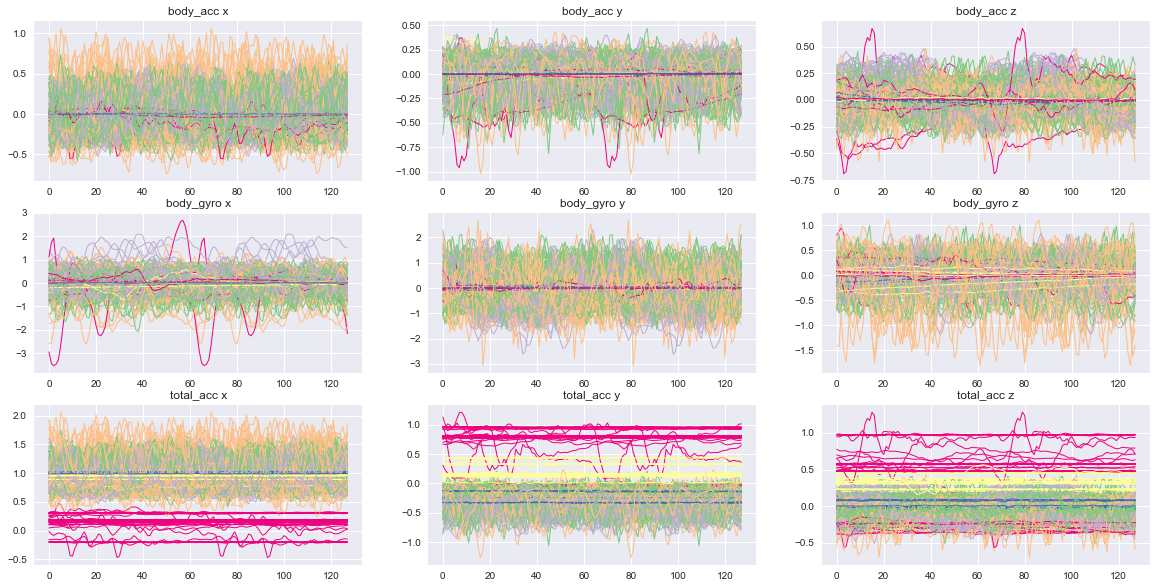

In [4]:
sample_to_plot = 50

fig = plt.figure(figsize=(20,10))
for i,(key,X) in enumerate(Data_Dic["train"].items()):
    ax = fig.add_subplot(3,3,i+1)
    plot_one_axe_shuffle(X, fig, ax, sample_to_plot, cmap=CMAP)
    ax.set_title(key[0]+ " " + key[1])
#plt.legend()

####  plot Activity in different window

In [5]:
def plot_one_axe_one_activity(Xgb, act, fig, ax, sample_to_plot, cmap):
    Xgb_first_values = Xgb.values[:sample_to_plot,:-1]
    for x in Xgb_first_values:
        ax.plot(x, linewidth=1, color=cmap(act-1))
    ax.set_title(label_dic[act])

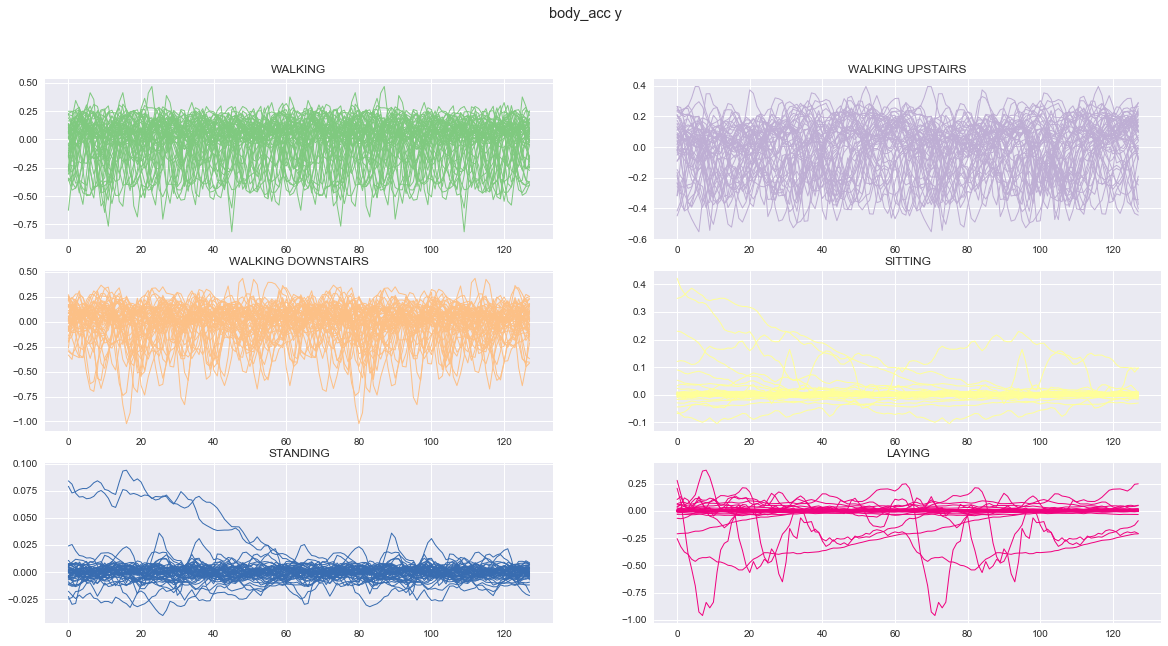

In [6]:
sample_to_plot = 50

fig = plt.figure(figsize=(20,10))
key = ("body_acc", "y")
X = Data_Dic["train"][key]
for i,(act,Xgb) in enumerate(X.groupby("Activity")):
    ax = fig.add_subplot(3,2,i+1)
    plot_one_axe_one_activity(Xgb, act, fig, ax, sample_to_plot, cmap=CMAP)
fig.suptitle(key[0]+ " " + key[1])

### plot two axes


In [7]:

sample_to_plot = 3
cmap = CMAP


X1 = Data_Dic["train"][("body_acc", "x")]
X2 = Data_Dic["train"][("body_acc", "y")]

data=[]
for act,Xgb1 in X1.groupby("Activity"):
    Xgb1_first_values = Xgb1.iloc[Xgb1.index[:sample_to_plot]].values[:,:-1]
    Xgb2_first_values = X2.iloc[Xgb1.index[:sample_to_plot]].values[:,:-1]
    x1 = Xgb1_first_values[0]
    x2 = Xgb2_first_values[0]
    colors = [cmap(act-1)] * 128
    z = list(range(128))
    data.append(go.Scatter3d(
    x=x1, y=x2, z=z, name = label_dic[act], legendgroup = label_dic[act],
    marker=dict(
        size=1,
        color=colors),
    line=dict(
        color=colors,
        width=3
    )))
    for i in range(sample_to_plot-1):
        x1 = Xgb1_first_values[i+1]
        x2 = Xgb2_first_values[i+1]
        data.append(go.Scatter3d(
                x=x1, y=x2, z=z, legendgroup = label_dic[act], showlegend = False,
                marker=dict(
                    size=1,
                    color=colors),
                line=dict(
                    color=colors,
                    width=3
                )))
            
layout = dict(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)
            
            
            
fig = dict(data=data, layout = layout)

pof.iplot(fig)

In [27]:
import pywt
(cA, cD) = pywt.dwt([1,2,3,4,5,6,7,8], 'db2')


[0]

In [ ]:


fig = coef_pyramid_plot(coefs[1:]) ;
plt.title("Wavelet Detail Coefficients");

fig.tight_layout()



sample_to_plot = 50

fig = plt.figure(figsize=(20,10))
key = ("body_acc", "y")
X = Data_Dic["train"][key]
for i,(act,Xgb) in enumerate(X.groupby("Activity")):
    ax = fig.add_subplot(3,2,i+1)
    coefs = pywt.wavedec(Xgb, 'db8')
    plot_one_axe_one_activity(Xgb, act, fig, ax, sample_to_plot, cmap=CMAP)
fig.suptitle(key[0]+ " " + key[1])
plt.show()